In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from network_model import *
from data import *
from Weather import Weather

In [2]:
train_data = get_data("result2.csv")
train_data['Date'] = train_data['Date'].apply(pd.to_datetime, dayfirst=True)

In [3]:
city_data = train_data.loc[train_data["Station_Name"]=="GDANSK"].sort_values(by='Date')
weather = Weather.to_weather(city_data)
temp_avg_temp = weather.temp_avg
weather.standardize()

In [4]:
x_train = weather.join_weather()
y_train = x_train[1:, [0]]

In [5]:
SPLIT_SIZE = 374
x_train, x_test = x_train[:len(x_train)-SPLIT_SIZE], x_train[len(x_train)-SPLIT_SIZE:]
y_train, y_test = y_train[:len(y_train)-SPLIT_SIZE], y_train[len(y_train)-SPLIT_SIZE:]

In [6]:
SIZE_OF_INPUT = 7
NUMBER_OF_NEURALS = 2
LENGHT_OF_CHART = 366

network = NeuralNetwork(x_train[0:SIZE_OF_INPUT].T, y_train[0:SIZE_OF_INPUT], NUMBER_OF_NEURALS)

In [13]:
for i in range(len(x_train)-8):
    network.train(x_train[i:i+SIZE_OF_INPUT].T, y_train[i+SIZE_OF_INPUT])

In [14]:
SIZE_OF_TEST = len(x_test)-8
y_output = np.zeros(SIZE_OF_TEST)
y_pred = np.zeros(SIZE_OF_TEST)
for i in range(SIZE_OF_TEST):
    network.train(x_test[i:i+SIZE_OF_INPUT].T, y_test[i+SIZE_OF_INPUT])
    y_output[i] = y_test[i+SIZE_OF_INPUT]
    y_pred[i] = network.output[0]

In [15]:
real_output = temp_avg_temp[-366:]
real_predict = unstandardize(y_pred, temp_avg_temp)

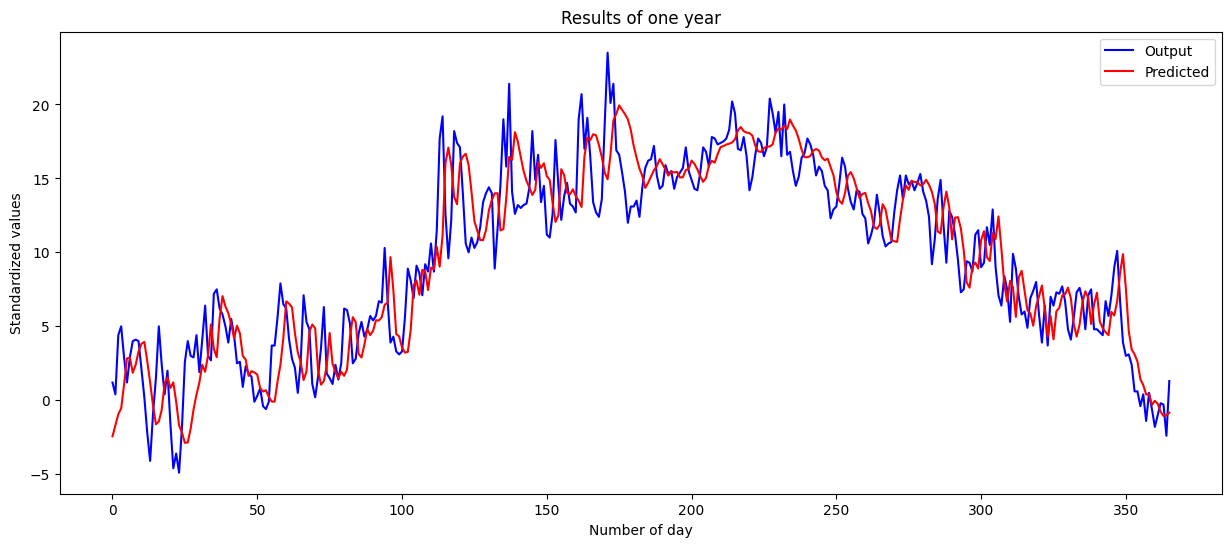

In [16]:
plt.figure(figsize=(15,6))
plt.title(f"Results of one year")
plt.xlabel("Number of day")
plt.ylabel("Standardized values")

x = np.arange(LENGHT_OF_CHART)
plt.plot(x, real_output, 'b', label="Output")
plt.plot(x, real_predict, 'r', label="Predicted")
plt.legend()
plt.show()

In [11]:
print(f"MSE: {network.mse(y_output, y_pred)}")
print(f"MAE: {network.mae(y_output, y_pred)}")

MSE: 0.08538684315846035
MAE: 0.2257314800242704


In [17]:
print(f"MSE: {network.mse(unstandardize(y_pred, temp_avg_temp),unstandardize(y_output, temp_avg_temp))}")
print(f"MAE: {network.mae(unstandardize(y_pred, temp_avg_temp),unstandardize(y_output, temp_avg_temp))}")

MSE: 4.953215476522526
MAE: 1.717409717693937
